In [148]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta
from ta.momentum import RSIIndicator

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [149]:
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data.head()

print(data.index)

[*********************100%***********************]  1 of 1 completed

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)


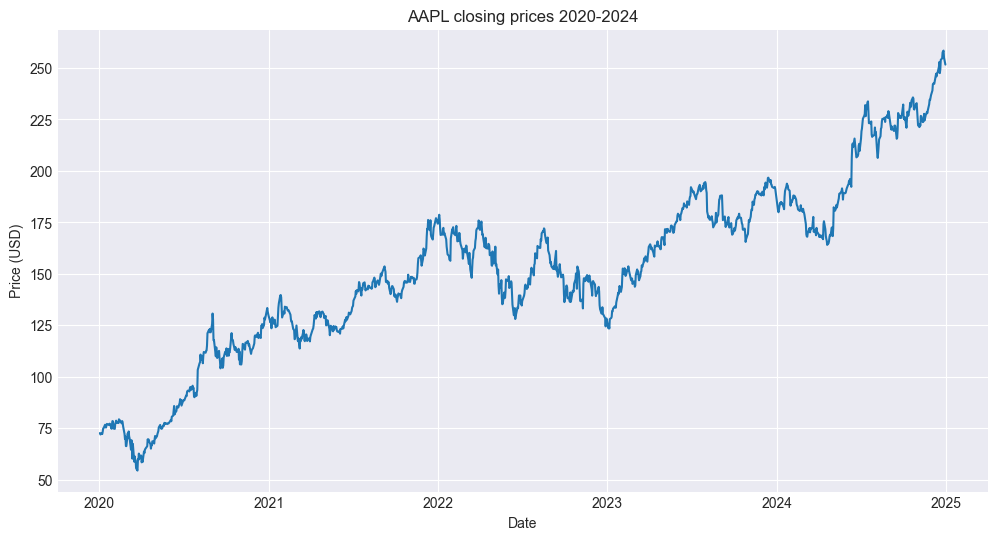

In [150]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label="Closing price")
plt.title("AAPL closing prices 2020-2024")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

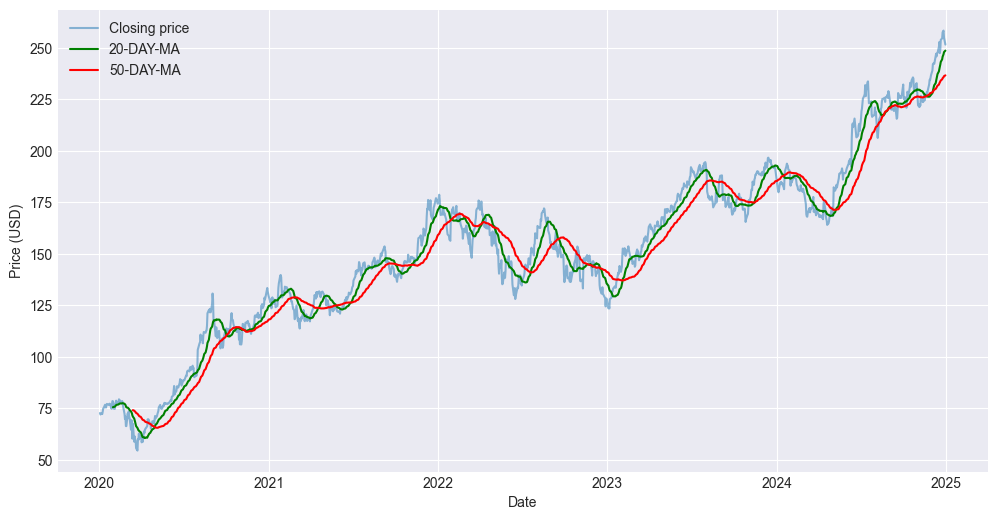

In [151]:
data['MA20'] = data['Close'].rolling(20).mean()
data['MA50'] = data['Close'].rolling(50).mean()
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], alpha=0.5, label="Closing price")
plt.plot(data.index, data['MA20'], label="20-DAY-MA", color="green")
plt.plot(data.index, data['MA50'], label="50-DAY-MA", color="red")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [152]:
data['STD20'] = data['Close'].rolling(20).std()

data['UpperBand'] = data['MA20'] + (2 * data['STD20'])
data['LowerBand'] = data['MA20'] - (2 * data['STD20'])

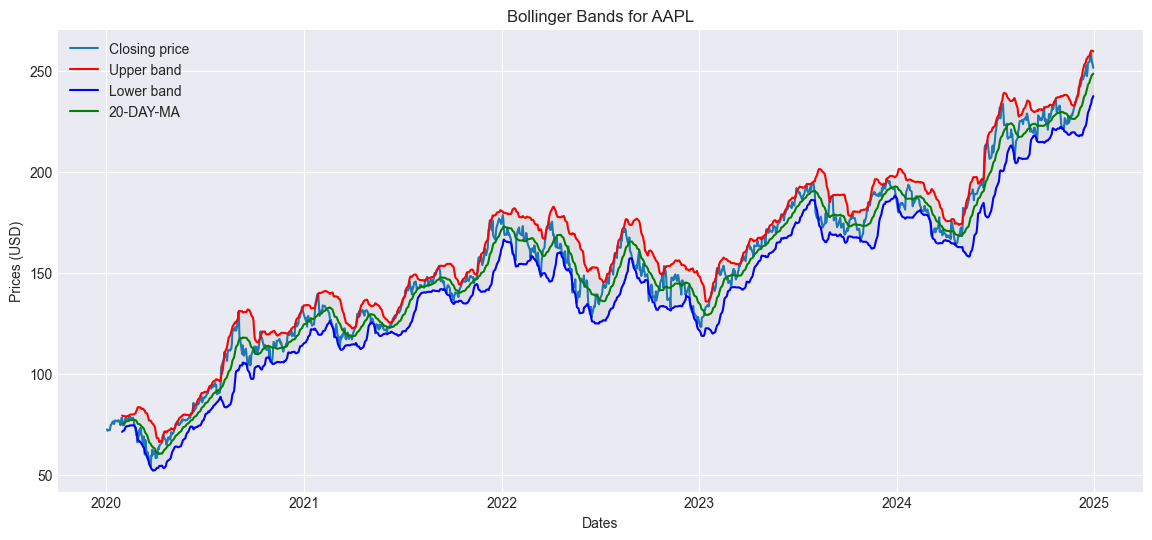

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2024-12-23    244.437349
2024-12-24    245.700803
2024-12-26    246.895920
2024-12-27    247.926434
2024-12-30    248.668145
Name: MA20, Length: 1257, dtype: float64


In [153]:
plt.figure(figsize=(14,6))
plt.plot(data.index, data['Close'], label="Closing price")
plt.plot(data.index, data['UpperBand'], label="Upper band",color="red")
plt.plot(data.index, data['LowerBand'], label="Lower band",color="blue")
plt.plot(data.index, data['MA20'], label="20-DAY-MA",color="green")
plt.fill_between(data.index, data['UpperBand'], data['LowerBand'], color="gray", alpha=0.1)
plt.title("Bollinger Bands for AAPL")
plt.xlabel("Dates")
plt.ylabel("Prices (USD)")
plt.legend()
plt.show()
print(data['MA20'])

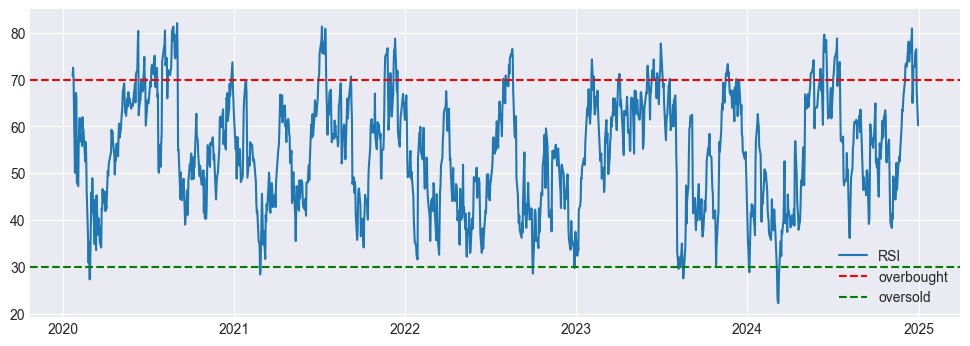

In [154]:
rsi = RSIIndicator(close=data['Close'].squeeze(), window=14)
data['RSI'] = rsi.rsi()

plt.figure(figsize=(12,4))
plt.plot(data.index, data['RSI'], label='RSI')
plt.axhline(70, color="red", linestyle="--", label="overbought")
plt.axhline(30, color="green", linestyle="--", label="oversold")
plt.legend()
plt.grid(True)
plt.show()